In [ ]:
words = open('names.txt', 'r').read().splitlines()
t = {}
for w in words:
    print(w)
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        #print(f"{ch1} {ch2} {ch3}")
        trigram = (ch1,ch2,ch3)
        t[trigram] = t.get(trigram, 0) + 1 #If trigram does not exist t.get(trigram, 0) returns a 0. 

In [5]:
unique_chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(unique_chars)}
itos = {i+1: s for i,s in enumerate(unique_chars)}
itos[0] = '.'
stoi['.'] = 0
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [8]:
import torch
xs, ys = [], []

for w in words[:1]:
    #print(w)
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        print(f"{ch1} {ch2} {ch3}")
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]

        xs.append([ix1, ix2])
        ys.append([ix3])

xs = torch.tensor(xs)
ys = torch.tensor(ys)



. e m
e m m
m m a
m a .


In [10]:
print(xs)
print(ys)

tensor([[ 0,  5],
        [ 5, 13],
        [13, 13],
        [13,  1]])
tensor([[13],
        [13],
        [ 1],
        [ 0]])


In [12]:
import torch.nn.functional as F
xencoded = F.one_hot(xs, num_classes =27)
print(xencoded)

tensor([[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0],
         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0]]])


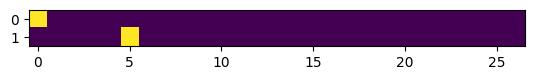

In [17]:
import matplotlib.pyplot as plt

plt.imshow(xencoded[0,:,:])